In [5]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [6]:
dark_horse = cv2.imread('DATA/horse.jpg')   # NAME_X = OPENCV OPERATIONS
show_horse = cv2.cvtColor(dark_horse, cv2.COLOR_BGR2RGB)  #SHOW_X = MATPLOTLIB

rainbow = cv2.imread('DATA/rainbow.jpg')
show_rainbow = cv2.cvtColor(rainbow, cv2.COLOR_BGR2RGB)

blue_bricks = cv2.imread('DATA/bricks.jpg')
show_bricks = cv2.cvtColor(blue_bricks, cv2.COLOR_BGR2RGB) 

#NOTE THAT IF U USE OPENCV TO PERFORM CALC THEN U HAVE TO TURN TO BGR COLOR ORDERS. If show want to show it, you use RBG

In [7]:
#plt.imshow(show_horse)

In [8]:
# OPENCV BGR
hist_values = cv2.calcHist( [blue_bricks], channels=[0], mask=None, histSize=[256], ranges=[0,256]) # up to not including 256

In [9]:
hist_values.shape

(256, 1)

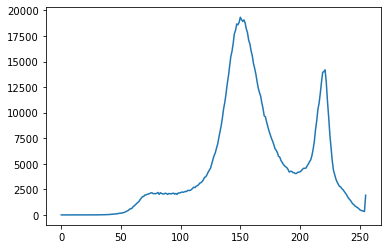

In [10]:
plt.plot(hist_values)

In [11]:
hist_values = cv2.calcHist( [dark_horse], channels=[0], mask=None, histSize=[256], ranges=[0,256]) # up to not including 256

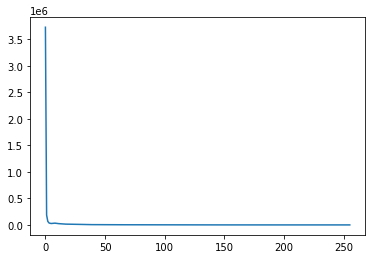

In [12]:
plt.plot(hist_values)   # NOT THAT MUCH BLUE CONTRIBUTED TO THE HORSE IMAGE 

In [13]:
img = blue_bricks

Text(0.5, 1.0, 'HISTOGRAM FOR BLUE BRICKS')

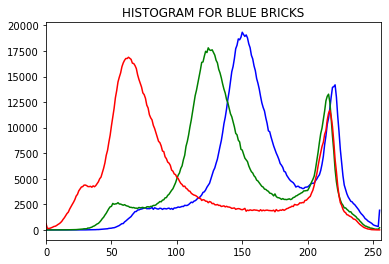

In [14]:
color = ('b', 'g', 'r')

for i, col in enumerate(color):   # CALL HISTOGRAM FUNCTIONS 3 TIMES, ONE FOR EACH COLOR
    histr = cv2.calcHist([img], [i], None, [256], [0,256])
    plt.plot(histr, color = col)
    plt.xlim([0,256])  # in case we get a very large histogram beyond 256
    
plt.title('HISTOGRAM FOR BLUE BRICKS')

In [15]:
# LOTS OF CONTRIBUTION FROM GREEN AND BLUE

Text(0.5, 1.0, 'HISTOGRAM FOR BLUE HORSE')

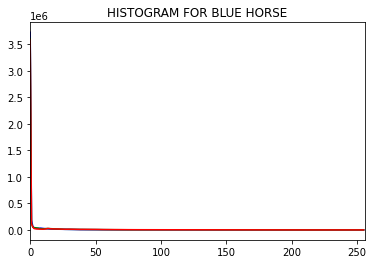

In [16]:
color = ('b', 'g', 'r')

for i, col in enumerate(color):   # CALL HISTOGRAM FUNCTIONS 3 TIMES, ONE FOR EACH COLOR
    histr = cv2.calcHist([dark_horse], [i], None, [256], [0,256])
    plt.plot(histr, color = col)
    plt.xlim([0,256])  # in case we get a very large histogram beyond 256
    
plt.title('HISTOGRAM FOR BLUE HORSE')

In [17]:
## CHANGING X-LIMIT TO ZOOM IN TO SEE THE VALUES BETWEEN 0 -50

Text(0.5, 1.0, 'HISTOGRAM FOR BLUE HORSE')

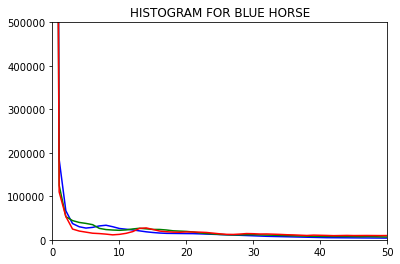

In [18]:
color = ('b', 'g', 'r')

for i, col in enumerate(color):   # CALL HISTOGRAM FUNCTIONS 3 TIMES, ONE FOR EACH COLOR
    histr = cv2.calcHist([dark_horse], [i], None, [256], [0,256])
    plt.plot(histr, color = col)
    plt.xlim([0,50])  # in case we get a very large histogram beyond 256
    plt.ylim([0,500000])
    
plt.title('HISTOGRAM FOR BLUE HORSE')

In [19]:
######## HISTOGRAM IN A SPECIFIC MASKED SECTION OF ROI ##########

In [20]:
rainbow = cv2.imread('DATA/rainbow.jpg')
show_rainbow = cv2.cvtColor(rainbow, cv2.COLOR_BGR2RGB)

In [21]:
img = rainbow

In [22]:
img.shape

(550, 413, 3)

In [23]:
mask = np.zeros(img.shape[:2], np.uint8)

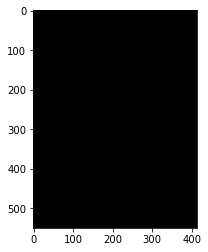

In [24]:
plt.imshow(mask, cmap = 'gray')

In [25]:
## GET A ROI TO PUT PART OF THE RAINBWO IMAGE INTO THAT ROI ##

In [26]:
mask[300:400, 100:400] = 255

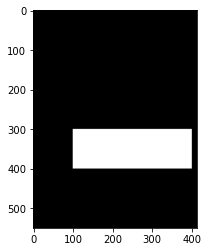

In [27]:
plt.imshow(mask, cmap='gray')

In [28]:
masked_img = cv2.bitwise_and(img, img, mask=mask)   # THE ACTUAL HISTOGRAM CALC

In [29]:
show_masked_img = cv2.bitwise_and(show_rainbow,show_rainbow, mask=mask)   # just for show (RGB format)

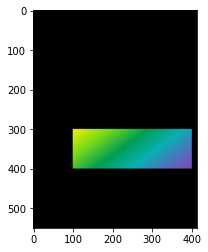

In [30]:
plt.imshow(show_masked_img)

In [31]:
hist_mask_values_red = cv2.calcHist( [rainbow], channels=[2], mask = mask, histSize = [256], ranges = [0,256]) #BGR

In [32]:
hist_values_red = cv2.calcHist( [rainbow], channels=[2], mask = None, histSize = [256], ranges = [0,256]) #BGR

Text(0.5, 1.0, 'RED HISTOGRAM FOR MASKED RAINBOW')

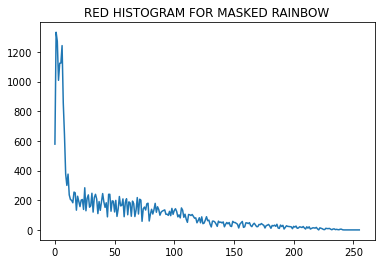

In [33]:
plt.plot(hist_mask_values_red)
plt.title('RED HISTOGRAM FOR MASKED RAINBOW')  #almost no red

Text(0.5, 1.0, 'RED HISTOGRAM FOR NORMAL RAINBOW')

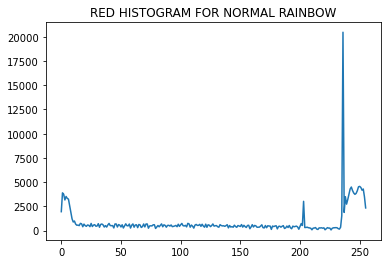

In [34]:
plt.plot(hist_values_red)
plt.title('RED HISTOGRAM FOR NORMAL RAINBOW')   #more red

In [35]:
#################################
#### HISTOGRAM EQUALIZATION #####
#################################

In [46]:
gorilla  = cv2.imread('DATA/gorilla.jpg', 0)

In [49]:
def display(img,cmap =None):
    fig = plt.figure(figsize = (10,8))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap)

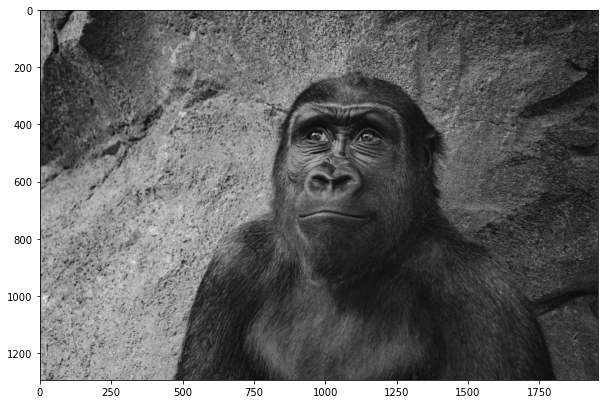

In [50]:
display(gorilla, cmap ='gray')

In [51]:
gorilla.shape

(1295, 1955)

In [55]:
hist_values = cv2.calcHist( [gorilla], channels=[0], mask=None, histSize=[256], ranges=[0,256]) # up to not including 256

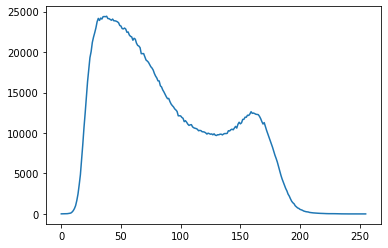

In [57]:
plt.plot(hist_values)

In [58]:
eq_gorilla = cv2.equalizeHist(gorilla)

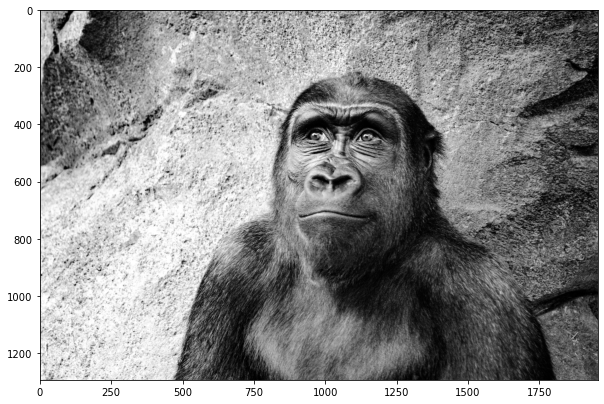

In [60]:
display(eq_gorilla, cmap = 'gray')

In [61]:
hist_values = cv2.calcHist( [eq_gorilla], channels=[0], mask=None, histSize=[256], ranges=[0,256]) # up to not including 256

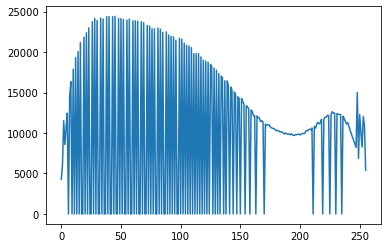

In [62]:
plt.plot(hist_values)

In [63]:
color_gorilla  = cv2.imread('DATA/gorilla.jpg')

In [64]:
show_gorrila = cv2.cvtColor(color_gorilla, cv2.COLOR_BGR2RGB)

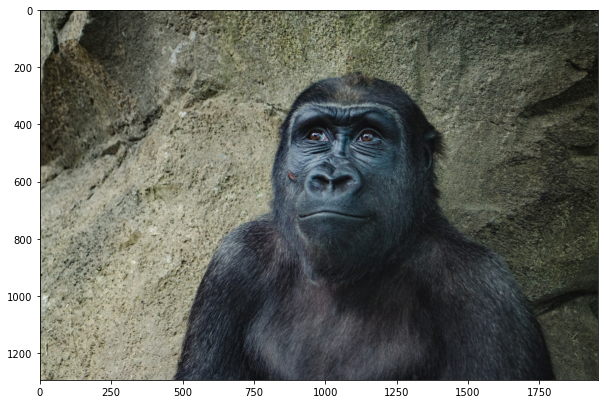

In [65]:
display(show_gorrila)

In [67]:
###### EQUALIZE COLORED IMAGE ?? ####
##  ->  Translate to HSV color image  ##

In [68]:
hsv = cv2.cvtColor( color_gorilla, cv2.COLOR_BGR2HSV)

In [86]:
#### -> Grab/ isolate the "value" channel in HSV (the useful part in this case)
####  -> Apply equalizeHist()
#### -> replace that with the original version by setting a variable eq_color_gorilla and passing the "equalized" hsv to it

hsv[ :, :, 2].max()

255

In [90]:
hsv[ :, :, 2] = cv2.equalizeHist(hsv[ :, :, 2])

In [91]:
eq_color_gorilla = cv2.cvtColor( hsv, cv2.COLOR_HSV2RGB)

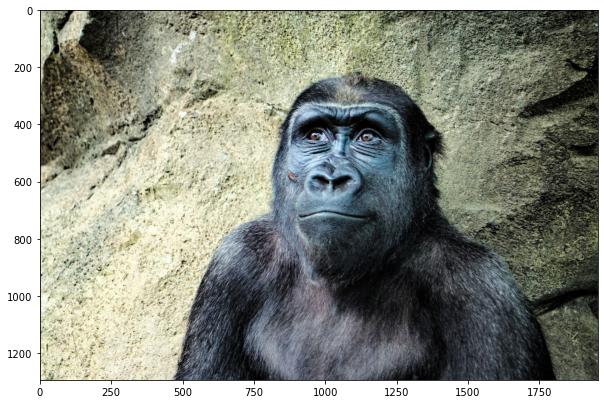

In [92]:
display(eq_color_gorilla)